## Minería de datos
### Autor: Piero Ulloa Mora
#### Exploratory Data Analysis

In [100]:
import nltk
import json
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
import logging
import tempfile
import gensim
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Let's read everything

In [70]:
lista_str_delete = [
    "Nuestra página web usa cookies para mejorar su funcionamiento y la interacción con esta. Gracias a las cookies, recolectamos algunos datos personales temporalmente. Puede cambiar la configuración en su navegador. Para más información, consulte nuestra Política de Privacidad",
    "Notificaciones Sputnik Nos comprotemos a proteger su información personal, por lo que hemos actualizado nuestra Política de privacidad para cumplir el Reglamento General de Protección de Datos (GDPR, por sus siglas en inglés), la nueva regulación de la UE que entró en vigor el 25 de mayo de 2018. Dado que ya ha compartido sus datos personales con nosotros al crear su cuenta personal, para seguir usándola, por favor, marque la siguiente casilla: Si no quiere que continuemos procesando sus datos, por favor, haga clic aquí para eliminar su cuenta. Si tiene dudas o preguntas sobre nuestra Política de privacidad, por favor, contáctenos vía privacy@sputniknews.com. El registro y la autorización del usuario en las páginas web de Sputnik a través de una o varias cuentas implica la aceptación de las siguientes reglas y condiciones de uso. El usuario se compromete a respetar la legislación nacional e internacional, a dirigirse de forma respetuosa a los demás participantes en los foros, a los otros lectores, así como a las personas mencionadas en las noticias y reportajes. La administración se reserva el derecho a eliminar los comentarios realizados en otro idioma distinto al usado en el contenido principal del material presentado. Los comentarios publicados por los usuarios en todas las versiones de la web sputniknews.com pueden ser editados. El comentario del usuario será eliminado si: La administración tiene derecho a bloquear el acceso del usuario a la página o a eliminar su cuenta sin previo aviso en caso de una violación de las normas de publicación de comentarios o si en sus acciones existen indicios de violencia. El usuario puede iniciar la recuperación del acceso a su cuenta enviando un mail a la siguiente dirección: moderator.mundo@sputniknews.com El mensaje debe contener: La restauración de la cuenta o el desbloqueo del acceso se efectuarán sólo si los moderadores lo consideran adecuado. En caso de violación reiterada de las condiciones de uso y un nuevo bloqueo, el acceso del usuario no podrá ser restaurado y, en consecuencia, el bloqueo será definitivo. Para comunicarse con el equipo de moderadores, por favor, escriba al siguiente correo electrónico: moderator.mundo@sputniknews.com Suscríbase a las notificaciones push de Sputnik Mundo",
    "Utilizamos cookies propias y de terceros para mejorar su experiencia y nuestros servicios, analizando la navegación en nuestro Sitio Web. Si continúa navegando, usted está aceptando su uso, le informamos que puede retirar su aceptación cuando lo desee.",
    "El León de El Español Publicaciones S.A.",
    "Redacción de CiberCuba",
    "{{#node}} {{fbtotalk}} shares -  {{fbcommentsk}} comentarios\n{{/node}",
    "editores@cibercuba.com\xa0  \xa0+34-962-353-194 Este sitio web utiliza cookies propias y de terceros, para mejorar la experiencia de usuario, recopilar estadísticas para optimizar la funcionalidad del sitio y entregar contenido y publicidad adaptados a sus intereses. Más información sobre nuestra política de privacidad.",
    "Accede con tu cuenta de Facebook, Twitter o Google+ Si todavía no eres usuario, Regístrate Selecciona el Idioma:",
    "Temas:\n\t      \tNicolás Maduro\n\t      \tCrisis\n\t      \tVenezuela Quiénes somos\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tContacto\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tRSS\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tMapa del sitio\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tPublicidad\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tAviso legal\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tPolítica de privacidad\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tPolítica de cookies PRENSA\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tSport\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tEl Periódico de Aragón\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tDiario La Grada\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tEl Periódico Extremadura\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tCórdoba\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tLa Crónica de Badajoz\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tMediterráneo REVISTAS\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tWoman\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tViajar\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tCuore\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tPrimera Línea\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tInterviú\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tTiempo\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tStilo\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tDigital Camera\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tAutohebdo Sport OTROS NEGOCIOS\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tZeta Gestión de Medios\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tZeta Kiosko",
    "Utilizamos cookies propias y de terceros para mejorar nuestros servicios y mostrarle publicidad relacionada con sus preferencias mediante el análisis de sus hábitos de navegación. Si continua navegando, consideramos que acepta su uso. Puede cambiar la configuración u obtener más información aquí. LINK",
    "Atresmedia Corporación de Medios de Comunicación SA Utilizamos cookies propias y de terceros para mejorar, recoger datos estadísticos y mostrarle publicidad relevante. Si continúa navegando, está aceptando su uso. Puede obtener más información o cambiar la configuración en política de cookies.",
    "Este sitio web utiliza cookies para que usted tenga la mejor experiencia de usuario. Si continúa navegando está dando su consentimiento para la aceptación de las mencionadas cookies y la aceptación de nuestra política de cookies, pinche el enlace para mayor información.\n\t\tACEPTAR",
    "Este sitio web utiliza cookies, puede obtener más información aquí",
    "Usamos cookies a fin de mejorar nuestro servicio. Encontrará más información en nuestras Políticas de privacidad.",
    "Usted debe estar registrado para introducir un comentario. Suscríbase a nuestro boletín electrónico y reciba en su correo el mejor análisis internacional en español. Gracias por suscribirse a la Newsletter de Política Exterior.",
    "Las cookies nos permiten ofrecer nuestros servicios. Al utilizar nuestros servicios, aceptas el uso que hacemos de las cookies. ¿Estás seguro de que quieres desconectarte?",
    "Por favor, introduzca un comentario.",
    "Quiénes somos\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tContacto\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tRSS\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tMapa del sitio\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tPublicidad\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tAviso legal\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tPolítica de privacidad\n\t\t\t\t\t\t\t              \n\t               \t\t\t\n\t\t\t\t\t\t\t\tPolítica de cookies PRENSA\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tSport\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tEl Periódico de Aragón\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tDiario La Grada\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tEl Periódico Extremadura\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tCórdoba\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tLa Crónica de Badajoz\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tMediterráneo REVISTAS\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tWoman\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tViajar\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tCuore\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tPrimera Línea\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tInterviú\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tTiempo\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tStilo\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tDigital Camera\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tAutohebdo Sport OTROS NEGOCIOS\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tZeta Gestión de Medios\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tZeta Kiosko",
    "Inicia la sesión Apegados a la libertad de expresión y a las políticas de privacidad, www.laprensa.com.ni modera los\n        comentarios. Para publicar un comentario más rápidamente debe iniciar sesión con su cuenta en Google o\n        Facebook.\n        No se publicaran comentarios que contengan expresiones ofensivas, imputaciones de delito, acusaciones\n        personales o que inciten a la violencia. Solo se publicarán aquellos comentarios cuyo contenido esté\n        relacionado a la nota. LA PRENSA tampoco publicará comentarios escritos en mayúsculas o que hagan enlace hacia otros sitios\n        webs no autorizados, y únicamente se publicará comentarios escritos en español. Los comentarios y opiniones que expresen nuestros lectores no son necesariamente compartidos por\n        Editorial LA PRENSA, ni la empresa se hace responsable por sus contenidos. Se le solicita a los lectores reportar un comentario publicado que contradiga estas disposiciones a:\n        edicion.digital@laprensa.com.ni para que sea removido. Si le vas a prestar tu celular a un amigo o familiar pero no quieres que abra ciertas aplicaciones o lea tus conversaciones de WhatsApp, configura tu dispositivo para bloquear al \"invitado\" y que no pu..",
    "Suscribase gratis para informarse del diario acontecer nacional e internacional. Descargue nuestra aplicación Km. 4 1/2 Carretera Norte,\n\t\t\t\t\t\t\t\t\tManagua,\n\t\t\t\t\t\t\t\t\tNicaragua.",
    "\nLA PRENSA/ ARCHIVO/ TOMADO DE PRESIDENCIA",
    "Apegados a la libertad de expresión y a las políticas de privacidad, www.laprensa.com.ni modera los\n        comentarios. Para publicar un comentario más rápidamente debe iniciar sesión con su cuenta en Google o\n        Facebook.\n        No se publicaran comentarios que contengan expresiones ofensivas, imputaciones de delito, acusaciones\n        personales o que inciten a la violencia. Solo se publicarán aquellos comentarios cuyo contenido esté\n        relacionado a la nota. LA PRENSA tampoco publicará comentarios escritos en mayúsculas o que hagan enlace hacia otros sitios\n        webs no autorizados, y únicamente se publicará comentarios escritos en español. Los comentarios y opiniones que expresen nuestros lectores no son necesariamente compartidos por\n        Editorial LA PRENSA, ni la empresa se hace responsable por sus contenidos. Se le solicita a los lectores reportar un comentario publicado que contradiga estas disposiciones a:\n        edicion.digital@laprensa.com.ni para que sea removido.",
    "Más entradas de TEOLOGÍA, ECONOMÍA Y LIBERTAD. Sobre este blog y su autor [1] https://www.abc.es/espana/abci-alfonso-guerra-compara-dictaduro-maduro-pinochet-menos-chile-economia-no-cayo-201901281355_noticia.html [2] https://alnavio.com/noticia/14139/actualidad/7-medidas-economicas-de-hugo-chavez-que-destruyeron-a-venezuela.html [3] https://es.wikipedia.org/wiki/Crisis_en_Venezuela [4] Roberto Cacahnosky, ¿Qué creerá Kicillof que es el mercado?, La Nación, 28 de noviembre de 2014 http://www.lanacion.com.ar/1747407-que-creera-kicillof-que-es-el-mercado La información proporcionada en este formulario sólo será utilizada para mandarle actualizaciones y marketing personalizado. Por favor, seleccione el contenido que desea recibir: Al enviar este formulario, aprueba transferir la información a Mailerlite para ser procesada siguiendo su Política de privacidad y sus Términos de servicio. Confirme su suscripción en el e-mail que acaba de recibir. Gracias a usted don Miguel por la información que nos va aportando en el caso. Muy agradecido también porque lea mis comentarios, en lo que puedan ayudar. Un saludo. “Intervenir los precios en el mercado es radicalmente injusto. Es ir contra la dignidad y la libertad de las personas.” Esto es una tesis sin fundamento; por ejemplo; si el poder público decide intervenir en el precio de la vivienda (sacando al mercado inmobiliario viviendas de protección oficial, por ejemplo) es “radicalmente injusto, contrario a la dignidad y la libertad de las personas”. Si el poder público decide intervenir en el precio de la luz, a través de condiciones en la concesión del servicio, para evitar su inflación “es radicalmente injusto, contrario a la dignidad y la libertad de las personas”. etc. Es una tesis anarco-liberal. Tan desastre es Venezuela con su socialismo como lo es Zaire con su ultra-capitalismo. Como si no hubieran otros factores en el bienestar de los pueblos, (como un buen sistema educativo, ética del trabajo) para centrarlo todo en el anarco-capitalismo (que al final es capitalismo de amiguetes) Combatir la inflación mediante el control de precios es intentar atacar la consecuencia de un problema, no el problema en sí. Nadie va a vender por debajo del precio (real) de mercado sino quiere arruinarse. Y esto no es una tesis ultraliberal sino un hecho probado y demostrado. Gracias por su comentario, cosmicon. Agradezco muchísimo los comentarios. Es cierto que el texto que entrecomilla es una opinión fuerte. Entiendo que le resulte contundente. En mi opinión, sí que es injusto sacar viviendas por debajo del precio de mercado: eso nunca sale gratis, porque quienes las pagan son las personas que compran el resto de viviendas de la promoción, aquellas que no son de protección oficial, a quienes el Estado obliga a pagar más: eso es una extorsión por parte del Estado. Sería distinto si, con los impuestos de todos se ayuda a quienes tienen una discapacidad y no tienen medios, a residir en una vivienda, y por supuesto sólo mientras les dure su discapacidad y su insuficiencia de medios. He visto personas en España a quienes les toca una vivienda de protección oficial porque tienen 26 años y muy poca renta… y cinco años después están viviendo en pareja y entre los dos ganan más de 50.000 Euros. Sí, me parece injusto. Con la luz o el alquiler, lo mismo. Menos mal que en el PSOE los conocimientos de sus economistas han prevalecido sobre su afán de ganar votos. Lo que quería hacer Podemos con la nueva ley de alquiler, hubiera perjudicado a todos, tanto a propietarios como a inquilinos, que tendrían menos oferta. Toca también Vd. un tema muy interesante. El libre mercado versus el capitalismo de amiguetes. Ya le dedicaré un artículo. O varios, porque es muy relevante. Ya le adelanto que no me gusta el nombre de capitalismo de amiguetes: es un capitalismo corrupto, o de corruptos: corruptos políticos con corruptos empresarios: y no tienen nada de libre mercado. No sabía que Zaire tiene ultra capitalismo (no tengo claro lo que es ultra en este caso, por cierto). Me gustaría saber más. El capitalismo se centra en desregular, en liberalizar, etc… en definitiva, en que haya menos Estado, por lo menos en lo que respecta a servicios susceptibles de tráfico económico (que al final son casi todos). En ese sentido, los países tercermundistas se caracterizan por una ausencia de estado; ausencia de servicios públicos (si eres pobre, no tienes acceso a educación, sanidad, ni a nada), y ausencia de regulaciones (trabajo esclavo infantil para sustraer minerales). Al final se trata de una cuestión de eficiencia; el modelo madurista es un desastre, pero el otro extremo no tiene por qué ser bueno. Creo que no se ha comentado una de las medidas ‘estrella’ allí, que fue devaluar y devaluar el bolívar, lo cual ha llevado a una inflación desvocada; sí comentada en el artículo por cierto. Fijarse que tras la 1a GM, Alemania quedó en tal deuda y miseria, que devaluó y devaluó el marco (medida hasta cierto punto aceptable) para tratar de estabilizar su maltrecha economía. Una barra de pan llegó a valer 4 millones de marcos…..no valía nada el marco alemán en el mercado. Venezuela, literalmente, es un país sobre un pozo de petróleo (que con un poco de cabeza ataban a los perros con longanizas, oye); pero el mantener ese tipo de ideología socio-comunista caciquil de “todo para el pueblo (pero sin el pueblo)” sale muy caro. Ahora mejor me callo y espero a leer la tercera parte del artículo, que imagino podrá abordar los intereses internacionales y la ayuda exterior actual o algo así. Gracias Alex. No da tiempo a comentar todo en detalle. La inflación viene de la devaluación… y de otras cosas. Una de las más importantes, es la impresión de dinero para financiar el gasto excesivo del Estado. Juan de Mariana estuvo encarcelado por un año y medio en Madrid, en 1607, por orden del mismo Felipe III y de su valido el Duque de Lerma a causa de su libro De monetae mutatione, por las alusiones a los ministros que modificaron el peso de la moneda. Juan de Mariana denunció duramente el robo de aquellos gobernantes que usaban el recurso que hoy llamaríamos inflación para financiar los gastos del Estado. Y por último, una vez que la inflación es alta, y la economía ha sido muy dañada, nadie se fía de la moneda del país. Los bolívares “queman” en las manos, y cuando uno recibe el sueldo, o la pensión, inmediatamente los cambia a dólares (si el gobierno de turno le deja, que no es el caso), o inmediatamente los gasta, para no sufrir su pérdida de valor.",
    'Política de comentarios jose garcia peña Creo que la peor de todas las comparaciones es la verdadera.\nChile se convirtió en colonia de Inglaterra con la guerra del\nPacífico y ahora es colonia de USA por haberlo recibido como\nherencia....Esa rareza llamada Chile\xa0·\xa0 16 February, 2019Cristian Joel Sánchez La verdad es que hacer una comparación entre la experiencia chilena de\nAllende y la de Chávez-Maduro de Venezuela con el fin de defender las\nsimilitudes, y quizás algunas diferencias, me parece...Venezuela, Allende y Maduro, las similitudes y las… diferencias\xa0·\xa0 12 February, 2019Cristian Joel Sánchez La verdad es que hacer una comparación entre la experiencia chilena de Allende y la de Chávez-Maduro de Venezuela con el fin de defender las similitudes, y quizás algunas diferencias, me parece...Venezuela, Allende y Maduro, las similitudes y las… diferencias\xa0·\xa0 12 February, 2019jose garcia peña Vox no es más que la materialización sin tapujos de la ideología\ngenocida franquista del Partido Popular que también comparten\nlas ratas del Partido Ciudadanos.\nTodos ellos están dispuestos a...¡No pasarán los fascistas en España!\xa0·\xa0 12 February, 2019olga larrazabal Inglaterra y Francia también quieren tener acceso a las riquezas de Venezuela,  En los últimos 200 años ambos países se han caractrizado por sus invasiones y guerras coloniales.  No son ángeles...La nueva Guerra Fría y Venezuela\xa0·\xa0 11 February, 2019olga larrazabal Parece que los y las comemierdas televisivas florecen en todas partes del mundo.Presentadora venezolana fantasea con una invasión de EE.UU. para “tener hijos gringuitos”\xa0·\xa0 11 February, 2019Lucia En resumen esta " modelo " considera a su País como un prostíbulo. Que lastima que tenga tal opinión de sus compatriotas.Presentadora venezolana fantasea con una invasión de EE.UU. para “tener hijos gringuitos”\xa0·\xa0 10 February, 2019jose garcia peña Los yanquis son expertos en utilizar el hambre de los animales\nsalvajes poniéndoles un cebo para cazarles. En este caso, al\ncebo lo llaman ayuda humanitaria. Los animales que quieren\ncazar para...EE.UU. y la Unión Europea preocupados por ‘el hambre’ en Venezuela. ¡Hipócritas! ¡795 millones padecen hambre en el mundo!\xa0·\xa0 10 February, 2019Federico E. Cavada Kuhlmann Estimado Héctor Felipe, no dije autoritario, fui más claro, dije totalitario. En los Gobiernos populares es posible que sea necesario aplicar ciertas dosis de totalitarismo para defenderse de los...Venezuela, Allende y Maduro, las similitudes y las… diferencias\xa0·\xa0 10 February, 2019Hector  Felipe Ortega V. Y Jose ,le has visto los labios, se ve a simple vista que aparte de ser una redomada puta es (una cupadora de pico,como dicen los chilenos,o una lamepolla en EspañaPresentadora venezolana fantasea con una invasión de EE.UU. para “tener hijos gringuitos”\xa0·\xa0 9 February, 2019 Tu presencia es importante, tu participación es imprescindible. Si deseas publicar un artículo, escríbenos a redaccion@piensachile.com • piensaChile.com es una iniciativa ciudadana sin fines de lucro. Los artículos y comentarios publicados son de exclusiva responsabilidad de sus autores, y no representan necesariamente la opinión de piensaChile.com 2001 - 2019 piensaChile.com •  Reproducción autorizada de los contenidos citando la fuente.',
    "Estimado lector: El Diario El Carabobeño es defensor de los valores democráticos y de la comunicación libre y plural, por lo que los invitamos a emitir sus comentarios con respeto. No está permitida la publicación de mensajes violentos, ofensivos, difamatorios o que infrinjan lo estipulado en el artículo 27 de la Ley de Responsabilidad en Radio, TV y Medios Electrónicos. Nos reservamos el derecho a eliminar los mensajes que incumplan esta normativa y serán suprimidos del portal los contenidos que violen la Constitución y las leyes. Noticias\n\n\n Opinión\n\n\n Investigación\n\n\n Parentesis\n\n\n Deportes",
    "Su opinión importa | Envíe sus cartas y comentarios sobre actualidad a correo@latercera.cl Ver condiciones, y sus objeciones al contenido o cobertura del diario a lector@latercera.com",
    'Este sitio usa Akismet para reducir el spam. Aprende cómo se procesan los datos de tus comentarios. <!--//<![CDATA[\n   var m3_u = (location.protocol==\'https:\'?\'https://img1.desarrollogd.es/adserver/www/delivery/ajs.php\':\'http://img1.desarrollogd.es/adserver/www/delivery/ajs.php\');\n   var m3_r = Math.floor(Math.random()*99999999999);\n   if (!document.MAX_used) document.MAX_used = \',\';\n   document.write ("<scr"+"ipt type=\'text/javascript\' src=\'"+m3_u); document.write ("?zoneid=69"); document.write (\'&cb=\' + m3_r); if (document.MAX_used != \',\') document.write ("&exclude=" + document.MAX_used); document.write (document.charset ? \'&charset=\'+document.charset : (document.characterSet ? \'&charset=\'+document.characterSet : \'\')); document.write ("&loc=" + escape(window.location)); if (document.referrer) document.write ("&referer=" + escape(document.referrer)); if (document.context) document.write ("&context=" + escape(document.context)); if (document.mmm_fo) document.write ("&mmm_fo=1"); document.write ("\'><\\/scr"+"ipt>");\n//]]>--> <!--//<![CDATA[\n   var m3_u = (location.protocol==\'https:\'?\'https://img1.desarrollogd.es/adserver/www/delivery/ajs.php\':\'http://img1.desarrollogd.es/adserver/www/delivery/ajs.php\');\n   var m3_r = Math.floor(Math.random()*99999999999);\n   if (!document.MAX_used) document.MAX_used = \',\';\n   document.write ("<scr"+"ipt type=\'text/javascript\' src=\'"+m3_u);\n   document.write ("?zoneid=215");\n   document.write (\'&cb=\' + m3_r);\n   if (document.MAX_used != \',\') document.write ("&exclude=" + document.MAX_used);\n   document.write (document.charset ? \'&charset=\'+document.charset : (document.characterSet ? \'&charset=\'+document.characterSet : \'\'));\n   document.write ("&loc=" + escape(window.location));\n   if (document.referrer) document.write ("&referer=" + escape(document.referrer));\n   if (document.context) document.write ("&context=" + escape(document.context));\n   if (document.mmm_fo) document.write ("&mmm_fo=1");\n   document.write ("\'><\\/scr"+"ipt>");\n//]]>--> <!--//<![CDATA[\n   var m3_u = (location.protocol==\'https:\'?\'https://img1.desarrollogd.es/adserver/www/delivery/ajs.php\':\'http://img1.desarrollogd.es/adserver/www/delivery/ajs.php\');\n   var m3_r = Math.floor(Math.random()*99999999999);\n   if (!document.MAX_used) document.MAX_used = \',\';\n   document.write ("<scr"+"ipt type=\'text/javascript\' src=\'"+m3_u);\n   document.write ("?zoneid=231");\n   document.write (\'&amp;cb=\' + m3_r);\n   if (document.MAX_used != \',\') document.write ("&amp;exclude=" + document.MAX_used);\n   document.write (document.charset ? \'&amp;charset=\'+document.charset : (document.characterSet ? \'&amp;charset=\'+document.characterSet : \'\'));\n   document.write ("&amp;loc=" + escape(window.location));\n   if (document.referrer) document.write ("&amp;referer=" + escape(document.referrer));\n   if (document.context) document.write ("&context=" + escape(document.context));\n   if (document.mmm_fo) document.write ("&amp;mmm_fo=1");\n   document.write ("\'><\\/scr"+"ipt>");\n//]]>--> <!--//<![CDATA[\n   var m3_u = (location.protocol==\'https:\'?\'https://img1.desarrollogd.es/adserver/www/delivery/ajs.php\':\'http://img1.desarrollogd.es/adserver/www/delivery/ajs.php\');\n   var m3_r = Math.floor(Math.random()*99999999999);\n   if (!document.MAX_used) document.MAX_used = \',\';\n   document.write ("<scr"+"ipt type=\'text/javascript\' src=\'"+m3_u);\n   document.write ("?zoneid=143");\n   document.write (\'&cb=\' + m3_r);\n   if (document.MAX_used != \',\') document.write ("&exclude=" + document.MAX_used);\n   document.write (document.charset ? \'&charset=\'+document.charset : (document.characterSet ? \'&charset=\'+document.characterSet : \'\'));\n   document.write ("&loc=" + escape(window.location));\n   if (document.referrer) document.write ("&referer=" + escape(document.referrer));\n   if (document.context) document.write ("&context=" + escape(document.context));\n   if (document.mmm_fo) document.write ("&mmm_fo=1");\n   document.write ("\'><\\/scr"+"ipt>");\n//]]>--> <!--//<![CDATA[\n   var m3_u = (location.protocol==\'https:\'?\'https://img1.desarrollogd.es/adserver/www/delivery/ajs.php\':\'http://img1.desarrollogd.es/adserver/www/delivery/ajs.php\');\n   var m3_r = Math.floor(Math.random()*99999999999);\n   if (!document.MAX_used) document.MAX_used = \',\';\n   document.write ("<scr"+"ipt type=\'text/javascript\' src=\'"+m3_u);\n   document.write ("?zoneid=56");\n   document.write (\'&cb=\' + m3_r);\n   if (document.MAX_used != \',\') document.write ("&exclude=" + document.MAX_used);\n   document.write (document.charset ? \'&charset=\'+document.charset : (document.characterSet ? \'&charset=\'+document.characterSet : \'\'));\n   document.write ("&loc=" + escape(window.location));\n   if (document.referrer) document.write ("&referer=" + escape(document.referrer));\n   if (document.context) document.write ("&context=" + escape(document.context));\n   if (document.mmm_fo) document.write ("&mmm_fo=1");\n   document.write ("\'><\\/scr"+"ipt>");\n//]]>--> widthIcon = "14";heightIcon = "14"; widthIcon = "14";heightIcon = "14"; Dirección: Avenida Constitución N20 Empresa auditada por OJD Interactiva',
    "DIARIO LA OPINIÓN - Av. 4 Nro. 16 - 12. Teléfono (+57) (7) 5829999 - Fax (+57) (7) 5831502 - Cúcuta - Colombia DIARIO LA OPINIÓN - Av. 4 Nro. 16 - 12. Teléfono (+57) (7) 5829999 - Fax (+57) (7) 5831502 - Cúcuta - Colombia",
    "Tu aporte es fundamental para sostener este proyecto... La Izquierda Diario no recibe aportes de empresarios ni de ningún Gobierno. En tiempos de ajuste y represión, se hace necesario fortalecer un medio para la resistencia. Suscribite a La Comunidad La Izquierda Diario y aportá para hacer posible un periodismo de izquierda.",
    "Crisis Venezuela\xa0\xa0\xa0/\xa0\xa0\xa0 Venezuela\xa0\xa0\xa0/\xa0\xa0\xa0 Política Argentina Brasil México Chile Estado Español Estados Unidos Francia AlemaniaUruguayVenezuelaBolivia",
    "Suscríbase a nuestro boletín semanal \"Periodismo en las Américas\" CONTÁCTENOS • NOSOTROS\xa0•\xa0POLÍTICA DE PRIVACIDAD",
    "Certifico que es información real y autorizo a Bio Bio para publicarla de la forma Que estime conveniente, manteniendo la confidencialidad de mis datos si asi lo deseo",
    "Nuestros comentarios son un espacio de conversación y debate. Recibimos con gusto críticas constructivas, pero nos reservamos el derecho a eliminar comentarios o bloquear usuarios agresivos, ofensivos o abusivos. Contenidos bajo licencia Creative Commons (CC-BY-NC) salvo donde indique lo contrario. | Basado en\n\t\t\t\tSistema WordPress.\n\t\t\t\tDesarrollado por BioBioChile 2009-2018 | Concepción, Chile. Nuestros comentarios son un espacio de conversación y debate. Recibimos con gusto críticas constructivas, pero nos reservamos el derecho a eliminar comentarios o bloquear usuarios agresivos, ofensivos o abusivos. Nuestros comentarios son un espacio de conversación y debate. Recibimos con gusto críticas constructivas, pero nos reservamos el derecho a eliminar comentarios o bloquear usuarios agresivos, ofensivos o abusivos.",
    "Facebook\n    Twitter\n    Buscar\n\n    Conéctate\n\n    \n        \n        \n    \n\n\t\n        Notificaciones\n        Configuración",
    "Tienes que estar registrado para poder escribir comentarios. Puedes registrarte gratis aquí. TODO\n                    MEJORES COMENTARIOS Facebook\n                Twitter ¿Has olvidado tu contraseña? Continuar con Facebook\n        Continuar con Twitter\n        Continuar con Google Continuar con Facebook\n                Continuar con Twitter\n                Continuar con Google",
    "Nuestros sitios:\n\t\t  \n    \n    Mi Diario\n\n\n    \n    \n    \n    Martes Financiero\n\n\n    \n    \n    \n    Ellas\n\n\n    \n    \n    \n    A la mesa\n\n\n    \n    \n    \n    Buscafácil\n\n\n    \n    \n    \n    Club La Prensa\n\n\n    \n    \n    \n    Corprensa\n\n\n    \n    \n    \n    Suscríbase a La Prensa\n\n\n    \n    \n    \n    Metro Por Metro \n\n\n    \n    \n    \n    TusTiquetes.com Sábado, 16 de febrero de 2019. Temas de hoy:\n    \n    \n    \n\nCanal de Panamá\n\n\n    \n    \n    \n    \n\nOdebrecht\n\n\n    \n    \n    \n    \n\nTribunal Electoral (TE)\n\n\n    \n    \n    \n    \n\nParlacen\n\n\n    \n    \n    \n    \n\nCorte Suprema de Justicia\n\n\n    \n    \n    \n    \n\nVenezuela\n\n\n    \n    \n    \n    \n\nRicardo Martinelli\n\n\n    \n    \n    \n    \n\nEstados Unidos",
    "Imprimir\n     comentarios La función de comentar está disponible solo para usuarios suscriptores. Lo invitamos a suscribirse y obtener todos los beneficios del Club La Prensa o, si ya es suscriptor, a ingresar. ¿Ya eres suscriptor? Inicia sesión Nombre de usuario\n                        \n                        \n                            El apodo es incorrecto Los comentarios son responsabilidad de cada autor que expresa libremente su opinión y no\n            de Corporación La Prensa, S.A. AP \n\n\n|\nYOLA, Nigeria Los principales candidatos de Nigeria condenaron este sábado 16 de febrero la decisión de última hora de posponer una semana ... AFP \n\n\n|\nNUEVA YORK, Estados Unidos El Museo Metropolitano de Arte (Met) devolverá a Egipto un antiguo ataúd bañado en oro después de que la justicia de Nueva ... Rafael Calvo, \n\n\n\nPanamá La novena de Coclé, con un racimo de ocho carreras en la última entrada, voltearon un marcador adverso\xa0y vencieron a Chiriquí ... Advertencia: Todo el contenido de www.prensa.com pertenece a Corporación La Prensa, S.A. Razón por la cual, el material publicado no se puede reproducir, copiar o transmitir sin previa autorización por escrito de Corporación La Prensa, S.A. Le agradecemos su cooperación y sugerencias a web@prensa.com y Servicio al Cliente. En caso de necesitar mayor información, llámenos al 323-6400. Contacte con La Prensa Corprensa\n      Apartado 0819-05620 El Dorado Ave. 12 de Octubre, Hato Pintado Panamá, República de Panamá",
    "A través de este formulario podrá dejarnos sus comentarios, sugerencias o inquietudes. No te pierdas de nada es Gratis! He leido y acepto los Términos y Condiciones de uso Al registrarte estás aceptando los \n\t\t    \tTérminos y Condiciones No te pierdas de nada es Gratis! He leido y acepto los Términos y Condiciones de uso He leído y acepto los términos y Condiciones Estas reportando este comentario a la redacción de El Cronista. A través de este formulario podrá recomendar la noticia que esta leyendo. EL CRONISTA\n\t\t\t\t            \t\t\n\t\t\t\t            \t\t\n\t\t\t\t            \t\t\n\t\t\t\t\t\t                INTERNACIONALES\n\t\t\t\t\t                \n\t\t\t\t\t                 \n\t\t\t\t\t\t\t\t \n\t\t\t\t\t\t\t\tGUAIDÓ Por\xa0 SERGIO\xa0LANZAFAME",
    'Puedes encontrar más contenido como este siguiéndonos en nuestras redes sociales de Facebook y Twitter (adsbygoogle = window.adsbygoogle || []).push({}); //\nvar m3_u = (location.protocol==\'https:\'?\'https://ads.latinongroup.com/delivery/ajs.php\':\'http://ads.latinongroup.com/delivery/ajs.php\');\nvar m3_r = Math.floor(Math.random()*99999999999);\nif (!document.MAX_used) document.MAX_used = \',\';\ndocument.write ("<scr"+"ipt type=\'text/javascript\' src=\'"+m3_u);\ndocument.write ("?zoneid=2545");\ndocument.write (\'&amp;cb=\' + m3_r);\nif (document.MAX_used != \',\') document.write ("&amp;exclude=" + document.MAX_used);\ndocument.write (document.charset ? \'&amp;charset=\'+document.charset : (document.characterSet ? \'&amp;charset=\'+document.characterSet : \'\'));\ndocument.write ("&amp;loc=" + escape(window.location));\nif (document.referrer) document.write ("&amp;referer=" + escape(document.referrer));\nif (document.context) document.write ("&context=" + escape(document.context));\nif (document.mmm_fo) document.write ("&amp;mmm_fo=1");\ndocument.write ("\'><\\/scr"+"ipt>");\n//]]&gt; (adsbygoogle = window.adsbygoogle || []).push({}); (adsbygoogle = window.adsbygoogle || []).push({}); (adsbygoogle = window.adsbygoogle || []).push({}); (adsbygoogle = window.adsbygoogle || []).push({}); (adsbygoogle = window.adsbygoogle || []).push({});',
    '(adsbygoogle = window.adsbygoogle || []).push({}); (adsbygoogle = window.adsbygoogle || []).push({}); (adsbygoogle = window.adsbygoogle || []).push({});',
    'Ahora puedes recibir notificaciones de BBC Mundo. Descarga la nueva versión de nuestra app y actívalas para no perderte nuestro mejor contenido.',
    "Comparte esta actualización en Estos son vínculos a páginas externas y abrirán en una nueva ventana "
]

In [71]:
archivos = ["NewsScraper/venezuela_hambre2.json", "NewsScraper/venezuela_represion2.json","NewsScraper/venezuela_economia2.json"]
for archivo in archivos:
    lista = []
    with open(archivo) as f:
        lista = json.load(f)
    for noticia in lista:
        noticia["texto"] = [t for t in noticia["texto"] if t not in lista_str_delete]
        if isinstance(noticia["fecha"], list) and len(noticia["fecha"]) > 0:    
            noticia["fecha"] = noticia["fecha"][0]
        elif isinstance(noticia["fecha"], list):
            noticia["fecha"] = None
    with open(archivo.split(".")[0] + "_fixed.json",'w') as fixed:
        json.dump(lista, fixed)


In [72]:
data_hambre = pd.read_json("NewsScraper/venezuela_hambre2_fixed.json")

In [73]:
data_represion = pd.read_json("NewsScraper/venezuela_represion2_fixed.json")

In [74]:
data_economia = pd.read_json("NewsScraper/venezuela_economia2_fixed.json")

Let's take a look at the datasets for a while

In [75]:
data_hambre.head()

,fecha,strategy,texto,title,url
0,2019-02-20T16:00:00+01:00,1,[X\n Al navegar por este sitio acep...,"Venezuela: Hambre, castigo y miedo, fórmula de...",https://www.es.amnesty.org/en-que-estamos/noti...
1,18/02/2019,2,"[NUEVA YORK, 18 Feb. (EUROPA PRESS) -, El pres...",Trump invita al Ejército venezolano a aceptar ...,https://www.europapress.es/internacional/notic...
2,2019-02-18T21:20:37Z,1,[Basada en hechos observados y verificados de ...,"Trump a los generales de Caracas: ""Tenéis que ...",https://www.elmundo.es/internacional/2019/02/1...
3,2019-02-20T22:04:44-04:30,1,"[Director: David Natera Febres, El presidente ...",Trump invita a militares venezolanos a aceptar...,http://www.correodelcaroni.com/index.php/inter...
4,None,2,"[Por Betsy Klein, Matthew Hoye, (CNN) — Donal...",Trump dará un discurso sobre Venezuela en Miam...,https://cnnespanol.cnn.com/2019/02/17/venezuel...


In [76]:
data_represion.head()

,fecha,strategy,texto,title,url
0,2019-02-51T12:41:39-0400,1,"[Amnistía Internacional, Guevara-Rosas destacó...",Amnistía: “Hay una represión sistemática contr...,http://www.el-nacional.com/noticias/politica/a...
1,21/02/2019,2,"[La directora para las Américas de AI, Érika G...",Denuncian escalada de represión en Venezuela,https://www.eluniversal.com.mx/mundo/denuncian...
2,2019-01-23T15:09:44-0300,1,[Los venezolanos salieron a la calle para marc...,Las fotos del caótico 23 de enero en Venezuela...,https://tn.com.ar/internacional/las-fotos-de-l...
3,None,2,[Juan Guaidó se proclamó presidente con el apo...,Temor en Venezuela por la represión al “golpe ...,https://noticias.perfil.com/2019/01/23/temor-e...
4,None,2,[El líder opositor Juan Guaidó denunció ante l...,Guaidó denuncia ante ONU ser víctima de repres...,https://www.20minutos.com/noticia/143299/0/gua...


In [77]:
data_economia.head()

,fecha,strategy,texto,title,url
0,2019-02-51T12:15:32-0400,1,[Estados Unidos busca la caída de Nicolás Madu...,En qué se parece la táctica de EE UU en Venezu...,http://www.el-nacional.com/noticias/bbc-mundo/...
1,12/06/0000,2,"[Comparte esta actualización en, Estos son vín...",Crisis en Venezuela: en qué se parece la estra...,https://www.bbc.com/mundo/noticias-america-lat...
2,2019-02-20,1,[A una economía hiperinflacionaria se suma otr...,Los efectos de las sanciones: ¿escenarios para...,https://cnnespanol.cnn.com/video/venezuela-efe...
3,,1,"[Yon Goicoechea, el designado para esta tarea,...",Exclusivo: el plan de Guaidó para reactivar la...,https://www.portafolio.co/internacional/este-e...
4,2019-02-08,1,"[Comparte esta noticia, Venezuela se asienta s...",El petróleo en el que se ahoga la economía de ...,https://es.euronews.com/2019/02/08/el-petroleo...


Let's tag every dataset with their category

In [78]:
data_hambre["category"] = "hambre"

In [79]:
data_represion["category"] = "represion"

In [80]:
data_economia["category"] = "economia"

Let's make a combined DATASET

In [81]:
combined = pd.concat([data_hambre,data_represion,data_economia]).reset_index(drop=True)
combined2 = pd.concat([data_hambre,data_represion,data_economia]).reset_index(drop=True)

#### We have almost equal amounts of every category and the goal is to evaluate the performance of unsupervised document classification, AKA clustering into detecting the category they belong to.

But we might need to do some cleanup, since there's a lot of stopwords, like Copyright notices, and use of cookies terms

In [82]:
combined.sample(10)

,fecha,strategy,texto,title,url,category
263,None,2,[La represión chavista en las horas bajas de M...,Represión en Venezuela: Suben a 26 los muertos...,https://www.periodistadigital.com/america/soci...,represion
145,2018-12-16T17:55:09+00:00,1,[El secretario general de la Organización de E...,Almagro sobre su expulsión del FA: Lo hacen pa...,http://efectococuyo.com/principales/almagro-so...,hambre
299,None,2,[Grupo La Provincia cumple quince años con una...,La represión de las protestas se ha segmentado...,https://www.grupolaprovincia.com/internacional...,represion
734,2018-04-18T09:10:29Z,1,[],La situación económica de Venezuela roza el de...,https://www.abc.es/economia/abci-situacion-eco...,economia
108,None,2,"[sábado, 26 de mayo de 2018 - 12:00 AM, Por B...",El hambre ataca a Venezuela,https://www.elnuevodia.com/noticias/mundo/nota...,hambre
18,2019-02-15T01:57:02+00:00,1,[“En Venezuela se repite un patrón: la gente t...,"“El hambre en Venezuela, a diferencia de Etiop...",https://www.el-carabobeno.com/el-hambre-en-ven...,hambre
186,2017-12-20,1,[Un vendedor espera en la oscuridad dentro de ...,"Venezuela, cuando el hambre y la pobreza se co...",https://www.elespanol.com/mundo/america/201712...,hambre
246,29/01/2019,2,"[TRUMP BLOQUEA LOS INGRESOS DE MADURO, laSexta...",Guaidó no descarta una intervención militar ex...,https://www.lasexta.com/noticias/internacional...,hambre
256,2019-01-30T18:20:20+01:00,1,[Cambio de paradigma en la represión contra lo...,Maduro traslada la represión a las clases humi...,https://www.elconfidencial.com/mundo/2019-01-3...,represion
312,1550624400,1,"[24 de enero de 2019 06:41 PM, Aunque la Guard...",Manifestantes responden a represión de Guardia...,https://www.elnuevoherald.com/noticias/mundo/a...,represion


In [83]:
combined2["texto"] = list(map(lambda x: "\n".join(x), combined2["texto"]))

In [84]:
combined2["texto"]

0      X\n            Al navegar por este sitio acept...
1      NUEVA YORK, 18 Feb. (EUROPA PRESS) -\nEl presi...
2      Basada en hechos observados y verificados de p...
3      Director: David Natera Febres\nEl presidente e...
4      Por Betsy Klein, Matthew Hoye\n(CNN) —  Donald...
5      En medio de una economía destruida, el líder o...
6      ¿Qué tan necesaria es la entrada de la ayuda h...
7      Caracas. Venezuela está en el límite. Los esta...
8      El país se prepara para la tensa jornada del s...
9      Primera modificación : 21/02/2019 - 00:23Últim...
10     En las pocas horas que estuvo en el paso front...
11     Por JOSHUA GOODMAN y VLADIMIR ISACHENKOV Assoc...
12     Venezuela cuenta con un Ejército cohesionado y...
13     Cúcuta. La crisis que vive Venezuela ha provoc...
14     "Lamentablemente los corredores humanitarios s...
15     Amnistía Internacional difundió un informe tit...
16     De visita en Barranquilla, Colombia, ciudad de...
17     Rosmery Quintero, presid

In [85]:
#Funcion utilizada para realizar la tokenización
def tokenization(text):
    text = re.split('\W+', text)
    return text

#Creación de nueva columna con el tweet una vez aplicada la función anterior
combined2['texto_tokenized'] = combined2['texto'].apply(lambda x: tokenization(x.lower()))
combined2.head()

,fecha,strategy,texto,title,url,category,texto_tokenized
0,2019-02-20T16:00:00+01:00,1,X\n Al navegar por este sitio acept...,"Venezuela: Hambre, castigo y miedo, fórmula de...",https://www.es.amnesty.org/en-que-estamos/noti...,hambre,"[x, al, navegar, por, este, sitio, aceptas, nu..."
1,18/02/2019,2,"NUEVA YORK, 18 Feb. (EUROPA PRESS) -\nEl presi...",Trump invita al Ejército venezolano a aceptar ...,https://www.europapress.es/internacional/notic...,hambre,"[nueva, york, 18, feb, europa, press, el, pres..."
2,2019-02-18T21:20:37Z,1,Basada en hechos observados y verificados de p...,"Trump a los generales de Caracas: ""Tenéis que ...",https://www.elmundo.es/internacional/2019/02/1...,hambre,"[basada, en, hechos, observados, y, verificado..."
3,2019-02-20T22:04:44-04:30,1,Director: David Natera Febres\nEl presidente e...,Trump invita a militares venezolanos a aceptar...,http://www.correodelcaroni.com/index.php/inter...,hambre,"[director, david, natera, febres, el, presiden..."
4,None,2,"Por Betsy Klein, Matthew Hoye\n(CNN) — Donald...",Trump dará un discurso sobre Venezuela en Miam...,https://cnnespanol.cnn.com/2019/02/17/venezuel...,hambre,"[por, betsy, klein, matthew, hoye, cnn, donald..."


In [86]:
# Definimos los stopwords adicionales del idioma a utilizar
stopword = nltk.corpus.stopwords.words('spanish') + ["venezuela"]

#Función para remover los stopwords de tweet
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
# Nueva columna con los articulos sin stopwords    
combined2['texto_nonstop'] = combined2['texto_tokenized'].apply(lambda x: remove_stopwords(x))
combined2.head(10)

,fecha,strategy,texto,title,url,category,texto_tokenized,texto_nonstop
0,2019-02-20T16:00:00+01:00,1,X\n Al navegar por este sitio acept...,"Venezuela: Hambre, castigo y miedo, fórmula de...",https://www.es.amnesty.org/en-que-estamos/noti...,hambre,"[x, al, navegar, por, este, sitio, aceptas, nu...","[x, navegar, sitio, aceptas, política, privaci..."
1,18/02/2019,2,"NUEVA YORK, 18 Feb. (EUROPA PRESS) -\nEl presi...",Trump invita al Ejército venezolano a aceptar ...,https://www.europapress.es/internacional/notic...,hambre,"[nueva, york, 18, feb, europa, press, el, pres...","[nueva, york, 18, feb, europa, press, presiden..."
2,2019-02-18T21:20:37Z,1,Basada en hechos observados y verificados de p...,"Trump a los generales de Caracas: ""Tenéis que ...",https://www.elmundo.es/internacional/2019/02/1...,hambre,"[basada, en, hechos, observados, y, verificado...","[basada, hechos, observados, verificados, prim..."
3,2019-02-20T22:04:44-04:30,1,Director: David Natera Febres\nEl presidente e...,Trump invita a militares venezolanos a aceptar...,http://www.correodelcaroni.com/index.php/inter...,hambre,"[director, david, natera, febres, el, presiden...","[director, david, natera, febres, presidente, ..."
4,None,2,"Por Betsy Klein, Matthew Hoye\n(CNN) — Donald...",Trump dará un discurso sobre Venezuela en Miam...,https://cnnespanol.cnn.com/2019/02/17/venezuel...,hambre,"[por, betsy, klein, matthew, hoye, cnn, donald...","[betsy, klein, matthew, hoye, cnn, donald, tru..."
5,None,2,"En medio de una economía destruida, el líder o...",Venezuela: más hambre y cierta esperanza,https://www.elobservador.com.uy/nota/venezuela...,hambre,"[en, medio, de, una, economía, destruida, el, ...","[medio, economía, destruida, líder, opositor, ..."
6,2019-2-12 22:23:00,1,¿Qué tan necesaria es la entrada de la ayuda h...,[VIDEO] Las cifras del hambre en Venezuela,http://www.t13.cl/videos/mundo/cifras-del-hamb...,hambre,"[, qué, tan, necesaria, es, la, entrada, de, l...","[, tan, necesaria, entrada, ayuda, humanitaria..."
7,2019-02-10T15:32:19-05:00,1,Caracas. Venezuela está en el límite. Los esta...,"Las voces de Venezuela: ""Aquí morimos de hambre""",https://elcomercio.pe/mundo/venezuela/voces-ve...,hambre,"[caracas, venezuela, está, en, el, límite, los...","[caracas, límite, estantes, tiendas, quedan, v..."
8,,1,El país se prepara para la tensa jornada del s...,"Venezolanos, entre la tensión y la esperanza",https://www.portafolio.co/internacional/venezo...,hambre,"[el, país, se, prepara, para, la, tensa, jorna...","[país, prepara, tensa, jornada, sábado, día, p..."
9,2019-02-21T00:23:13+01:00,1,Primera modificación : 21/02/2019 - 00:23Últim...,"Duelo de conciertos por Venezuela, un enfrenam...",https://www.france24.com/es/20190220-concierto...,hambre,"[primera, modificación, 21, 02, 2019, 00, 23úl...","[primera, modificación, 21, 02, 2019, 00, 23úl..."


In [87]:
ps = nltk.PorterStemmer()
# Función para aplicas stemming al tweet
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

# Nueva columna luego de aplicar la función creada
combined2['texto_stemmed'] = combined2['texto_nonstop'].apply(lambda x: stemming(x))
combined2.head()

,fecha,strategy,texto,title,url,category,texto_tokenized,texto_nonstop,texto_stemmed
0,2019-02-20T16:00:00+01:00,1,X\n Al navegar por este sitio acept...,"Venezuela: Hambre, castigo y miedo, fórmula de...",https://www.es.amnesty.org/en-que-estamos/noti...,hambre,"[x, al, navegar, por, este, sitio, aceptas, nu...","[x, navegar, sitio, aceptas, política, privaci...","[x, navegar, sitio, acepta, política, privacid..."
1,18/02/2019,2,"NUEVA YORK, 18 Feb. (EUROPA PRESS) -\nEl presi...",Trump invita al Ejército venezolano a aceptar ...,https://www.europapress.es/internacional/notic...,hambre,"[nueva, york, 18, feb, europa, press, el, pres...","[nueva, york, 18, feb, europa, press, presiden...","[nueva, york, 18, feb, europa, press, presiden..."
2,2019-02-18T21:20:37Z,1,Basada en hechos observados y verificados de p...,"Trump a los generales de Caracas: ""Tenéis que ...",https://www.elmundo.es/internacional/2019/02/1...,hambre,"[basada, en, hechos, observados, y, verificado...","[basada, hechos, observados, verificados, prim...","[basada, hecho, observado, verificado, primera..."
3,2019-02-20T22:04:44-04:30,1,Director: David Natera Febres\nEl presidente e...,Trump invita a militares venezolanos a aceptar...,http://www.correodelcaroni.com/index.php/inter...,hambre,"[director, david, natera, febres, el, presiden...","[director, david, natera, febres, presidente, ...","[director, david, natera, febr, president, est..."
4,None,2,"Por Betsy Klein, Matthew Hoye\n(CNN) — Donald...",Trump dará un discurso sobre Venezuela en Miam...,https://cnnespanol.cnn.com/2019/02/17/venezuel...,hambre,"[por, betsy, klein, matthew, hoye, cnn, donald...","[betsy, klein, matthew, hoye, cnn, donald, tru...","[betsi, klein, matthew, hoy, cnn, donald, trum..."


In [99]:
#Funcion utilizada para remover los signos de puntuación
def remove_punct(text):
    for punc in string.punctuation:
        text = text.replace(punc,"")
    text = re.sub('[0-9]+', '', text)
    return text
#Creación de una nueva columna con el tweet sin signos de puntuación
combined2['texto_punct'] = combined2['texto'].apply(lambda x: remove_punct(x))
sid = SentimentIntensityAnalyzer() 
# Creación de una nueva columna con el valor de sentimiento del tweet
combined2["sentiment"] = combined2["texto"].apply(lambda x: sid.polarity_scores(x)["compound"])
combined2.head(10)

,fecha,strategy,texto,title,url,category,texto_tokenized,texto_nonstop,texto_stemmed,texto_lemmatized,texto_punct,sentiment
0,2019-02-20T16:00:00+01:00,1,X\n Al navegar por este sitio acept...,"Venezuela: Hambre, castigo y miedo, fórmula de...",https://www.es.amnesty.org/en-que-estamos/noti...,hambre,"[x, al, navegar, por, este, sitio, aceptas, nu...","[x, navegar, sitio, aceptas, política, privaci...","[x, navegar, sitio, acepta, política, privacid...","[x, navegar, sitio, aceptas, política, privaci...",X\n Al navegar por este sitio acept...,-0.5707
1,18/02/2019,2,"NUEVA YORK, 18 Feb. (EUROPA PRESS) -\nEl presi...",Trump invita al Ejército venezolano a aceptar ...,https://www.europapress.es/internacional/notic...,hambre,"[nueva, york, 18, feb, europa, press, el, pres...","[nueva, york, 18, feb, europa, press, presiden...","[nueva, york, 18, feb, europa, press, presiden...","[nueva, york, 18, feb, europa, press, presiden...",NUEVA YORK Feb EUROPA PRESS \nEl presidente e...,0.9921
2,2019-02-18T21:20:37Z,1,Basada en hechos observados y verificados de p...,"Trump a los generales de Caracas: ""Tenéis que ...",https://www.elmundo.es/internacional/2019/02/1...,hambre,"[basada, en, hechos, observados, y, verificado...","[basada, hechos, observados, verificados, prim...","[basada, hecho, observado, verificado, primera...","[basada, hechos, observados, verificados, prim...",Basada en hechos observados y verificados de p...,-0.8750
3,2019-02-20T22:04:44-04:30,1,Director: David Natera Febres\nEl presidente e...,Trump invita a militares venezolanos a aceptar...,http://www.correodelcaroni.com/index.php/inter...,hambre,"[director, david, natera, febres, el, presiden...","[director, david, natera, febres, presidente, ...","[director, david, natera, febr, president, est...","[director, david, natera, febres, presidente, ...",Director David Natera Febres\nEl presidente es...,0.9921
4,None,2,"Por Betsy Klein, Matthew Hoye\n(CNN) — Donald...",Trump dará un discurso sobre Venezuela en Miam...,https://cnnespanol.cnn.com/2019/02/17/venezuel...,hambre,"[por, betsy, klein, matthew, hoye, cnn, donald...","[betsy, klein, matthew, hoye, cnn, donald, tru...","[betsi, klein, matthew, hoy, cnn, donald, trum...","[betsy, klein, matthew, hoye, cnn, donald, tru...",Por Betsy Klein Matthew Hoye\nCNN — Donald Tr...,0.0000
5,None,2,"En medio de una economía destruida, el líder o...",Venezuela: más hambre y cierta esperanza,https://www.elobservador.com.uy/nota/venezuela...,hambre,"[en, medio, de, una, economía, destruida, el, ...","[medio, economía, destruida, líder, opositor, ...","[medio, economía, destruida, líder, opositor, ...","[medio, economía, destruida, líder, opositor, ...",En medio de una economía destruida el líder op...,-0.5267
6,2019-2-12 22:23:00,1,¿Qué tan necesaria es la entrada de la ayuda h...,[VIDEO] Las cifras del hambre en Venezuela,http://www.t13.cl/videos/mundo/cifras-del-hamb...,hambre,"[, qué, tan, necesaria, es, la, entrada, de, l...","[, tan, necesaria, entrada, ayuda, humanitaria...","[, tan, necesaria, entrada, ayuda, humanitaria...","[, tan, necesaria, entrada, ayuda, humanitaria...",¿Qué tan necesaria es la entrada de la ayuda h...,0.0000
7,2019-02-10T15:32:19-05:00,1,Caracas. Venezuela está en el límite. Los esta...,"Las voces de Venezuela: ""Aquí morimos de hambre""",https://elcomercio.pe/mundo/venezuela/voces-ve...,hambre,"[caracas, venezuela, está, en, el, límite, los...","[caracas, límite, estantes, tiendas, quedan, v...","[caraca, límite, estant, tienda, quedan, vacío...","[caracas, límite, estantes, tiendas, quedan, v...",Caracas Venezuela está en el límite Los estant...,-0.9902
8,,1,El país se prepara para la tensa jornada del s...,"Venezolanos, entre la tensión y la esperanza",https://www.portafolio.co/internacional/venezo...,hambre,"[el, país, se, prepara, para, la, tensa, jorna...","[país, prepara, tensa, jornada, sábado, día, p...","[paí, prepara, tensa, jornada, sábado, día, pr...","[país, prepara, tensa, jornada, sába

In [88]:
wn = nltk.WordNetLemmatizer()
# Función utilizada para aplicar lematización al tweet
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# Nueva columna creada aplicando la función definida anteriormente    
combined2['texto_lemmatized'] = combined2['texto_nonstop'].apply(lambda x: lemmatizer(x))
combined2.head()

,fecha,strategy,texto,title,url,category,texto_tokenized,texto_nonstop,texto_stemmed,texto_lemmatized
0,2019-02-20T16:00:00+01:00,1,X\n Al navegar por este sitio acept...,"Venezuela: Hambre, castigo y miedo, fórmula de...",https://www.es.amnesty.org/en-que-estamos/noti...,hambre,"[x, al, navegar, por, este, sitio, aceptas, nu...","[x, navegar, sitio, aceptas, política, privaci...","[x, navegar, sitio, acepta, política, privacid...","[x, navegar, sitio, aceptas, política, privaci..."
1,18/02/2019,2,"NUEVA YORK, 18 Feb. (EUROPA PRESS) -\nEl presi...",Trump invita al Ejército venezolano a aceptar ...,https://www.europapress.es/internacional/notic...,hambre,"[nueva, york, 18, feb, europa, press, el, pres...","[nueva, york, 18, feb, europa, press, presiden...","[nueva, york, 18, feb, europa, press, presiden...","[nueva, york, 18, feb, europa, press, presiden..."
2,2019-02-18T21:20:37Z,1,Basada en hechos observados y verificados de p...,"Trump a los generales de Caracas: ""Tenéis que ...",https://www.elmundo.es/internacional/2019/02/1...,hambre,"[basada, en, hechos, observados, y, verificado...","[basada, hechos, observados, verificados, prim...","[basada, hecho, observado, verificado, primera...","[basada, hechos, observados, verificados, prim..."
3,2019-02-20T22:04:44-04:30,1,Director: David Natera Febres\nEl presidente e...,Trump invita a militares venezolanos a aceptar...,http://www.correodelcaroni.com/index.php/inter...,hambre,"[director, david, natera, febres, el, presiden...","[director, david, natera, febres, presidente, ...","[director, david, natera, febr, president, est...","[director, david, natera, febres, presidente, ..."
4,None,2,"Por Betsy Klein, Matthew Hoye\n(CNN) — Donald...",Trump dará un discurso sobre Venezuela en Miam...,https://cnnespanol.cnn.com/2019/02/17/venezuel...,hambre,"[por, betsy, klein, matthew, hoye, cnn, donald...","[betsy, klein, matthew, hoye, cnn, donald, tru...","[betsi, klein, matthew, hoy, cnn, donald, trum...","[betsy, klein, matthew, hoye, cnn, donald, tru..."


In [89]:
#Función para obtener el texto sin signos de puntiación, tokenizado, con stemming y sin stopwords
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(combined2['texto'])
print('{} artículos tienen {} words'.format(countVector.shape[0], countVector.shape[1]))

870 artículos tienen 24168 words


In [90]:
# Creación de un nuevo dataframe con las palabras de los tweets
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

,,aa,aaron,aarón,abadi,abajo,abamblea,abanca,abandera,abandon,...,órgano,óscar,última,último,únete,única,únicament,único,útil,útile
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [91]:
len(countVectorizer.get_feature_names())

24168

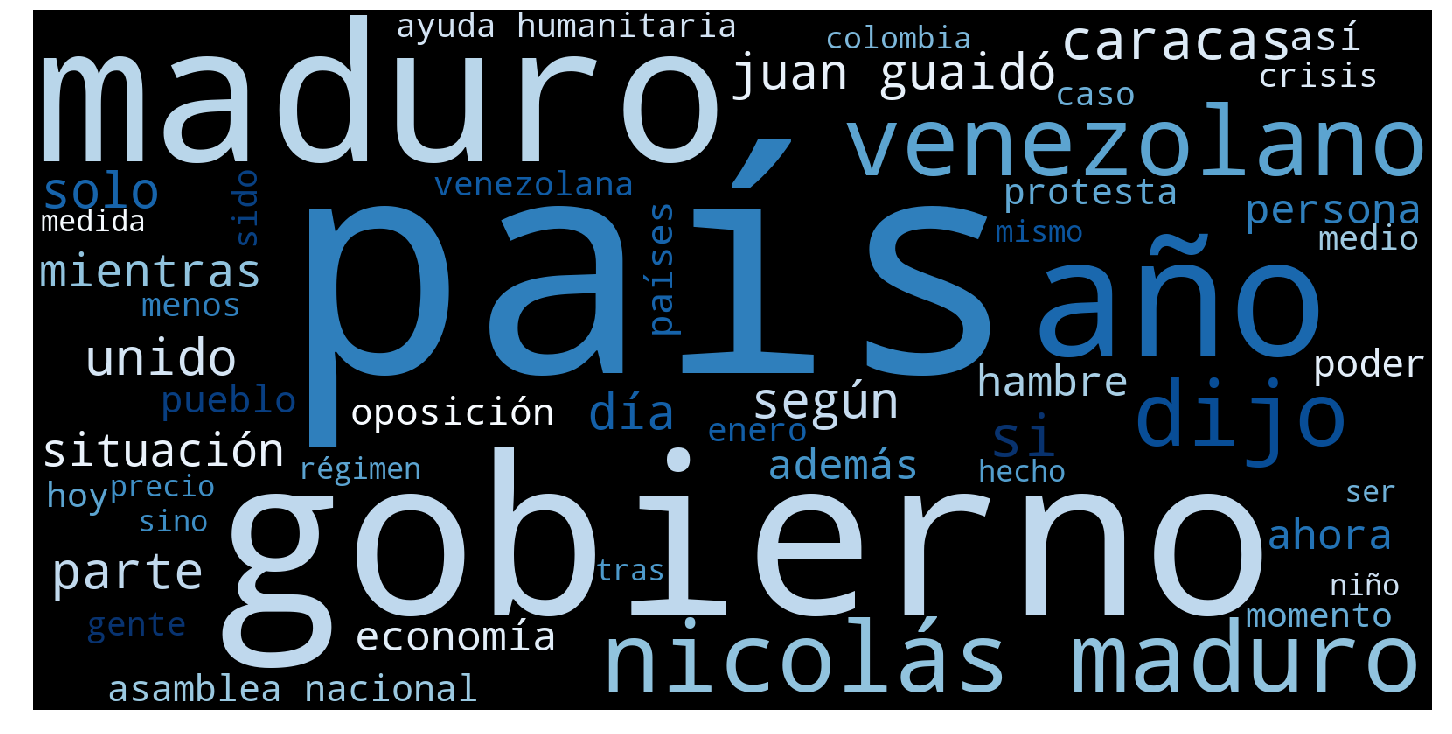

In [92]:
all_words = combined2['texto_lemmatized'].tolist()
cleaned_words = [item for sublist in all_words for item in sublist]

# Convierte  clean_words a una serie y cuenta las ocurrencias más frecuentes
cleaned_words_series = pd.Series(cleaned_words)
words_counts = cleaned_words_series.value_counts()
hashes = cleaned_words_series.values
hashes = hashes.tolist()

# Convierte la lista a un string con todas las palabras
hashes_words = " ".join(hashes)

# Genera la nube de palabras con las palabras más utilizadas
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [106]:
#Construimos el corpus
corpus=[]
for i in range(len(combined2['texto_punct'])):
    a = combined2['texto_punct'][i]
    corpus.append(a)

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/var/folders/ht/fwrg68tx2mxdbypbtlr6vm4r0000gn/T" will be used to save temporary dictionary and corpus.


In [107]:
import os

# Remueve las palabras comunes
stoplist = stopword + list(string.punctuation)

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))  # Guarda el diccionario para futuras referencias
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'tweet.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

2019-02-21 16:07:55,886 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-21 16:07:56,246 : INFO : built Dictionary(30523 unique tokens: ['acciones', 'aceptas', 'acepto', 'actuando', 'amnistía']...) from 870 documents (total 265544 corpus positions)
2019-02-21 16:07:56,247 : INFO : saving Dictionary object under /var/folders/ht/fwrg68tx2mxdbypbtlr6vm4r0000gn/T/tweets.dict, separately None
2019-02-21 16:07:56,261 : INFO : saved /var/folders/ht/fwrg68tx2mxdbypbtlr6vm4r0000gn/T/tweets.dict
2019-02-21 16:07:56,532 : INFO : storing corpus in Matrix Market format to /var/folders/ht/fwrg68tx2mxdbypbtlr6vm4r0000gn/T/tweet.mm
2019-02-21 16:07:56,533 : INFO : saving sparse matrix to /var/folders/ht/fwrg68tx2mxdbypbtlr6vm4r0000gn/T/tweet.mm
2019-02-21 16:07:56,534 : INFO : PROGRESS: saving document #0
2019-02-21 16:07:56,819 : INFO : saved 870x30523 matrix, density=0.752% (199753/26555010)
2019-02-21 16:07:56,820 : INFO : saving MmCorpus index to /var/folders/ht/fwrg68tx2mxdb

In [115]:
#Definimos el total de tópicos que deseamos usar
total_topics = 3
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics, passes= 3, eval_every=1, iterations=20000, update_every=0)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

#Visualizando el dataframe con los tópicos obtenidos
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

2019-02-21 16:21:32,593 : INFO : using symmetric alpha at 0.3333333333333333
2019-02-21 16:21:32,596 : INFO : using symmetric eta at 0.3333333333333333
2019-02-21 16:21:32,604 : INFO : using serial LDA version on this node
2019-02-21 16:21:32,617 : INFO : running batch LDA training, 3 topics, 3 passes over the supplied corpus of 870 documents, updating model once every 870 documents, evaluating perplexity every 870 documents, iterating 20000x with a convergence threshold of 0.001000
2019-02-21 16:21:32,618 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-21 16:21:41,842 : INFO : -10.910 per-word bound, 1924.3 perplexity estimate based on a held-out corpus of 870 documents with 265544 words
2019-02-21 16:21:41,843 : INFO : PROGRESS: pass 0, at document #870/870
2019-02-21 16:21:50,467 : INFO : topic #0 (0.333): 0.006*"país" + 0.005*"maduro" + 0.005*"gobierno" + 0.004*"crisis" + 0.003*"millones" +

(42, 3)
(3, 42)


,ayuda,año,años,caracas,colombia,crisis,cuenta,dijo,dos,economía,...,protestas,pueblo,según,ser,si,situación,unidos,venezolana,venezolano,venezolanos
0,0.002456,0.002196,0.003494,0.000000,0.0021,0.004041,0.00221,0.002901,0.002293,0.000000,...,0.000000,0.00212,0.000000,0.00211,0.003825,0.002294,0.000000,0.000000,0.002722,0.003566
1,0.000000,0.002730,0.003668,0.002654,0.0000,0.002620,0.00000,0.002422,0.002457,0.002212,...,0.002311,0.00000,0.002744,0.00000,0.002169,0.000000,0.002148,0.000000,0.000000,0.002303
2,0.000000,0.000000,0.002963,0.000000,0.0000,0.003030,0.00000,0.002531,0.000000,0.002838,...,0.000000,0.00000,0.002691,0.00000,0.002308,0.000000,0.002881,0.002339,0.002545,0.002908


In [116]:
#Realizamos la visualización interactiva de los tópicos encontrados con su respectiva relevancia
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -372.142456 -195.243271       1        1  39.499081
2     -437.769562 -443.703552       2        1  32.140278
1     -620.127258 -262.638367       3        1  28.360641, topic_info=      Category      Freq             Term     Total  loglift  logprob
term                                                                 
184    Default  6.000000           maduro  6.000000  30.0000  30.0000
1948   Default  0.000000            pdvsa  0.000000  29.0000  29.0000
1063   Default  0.000000        represión  0.000000  28.0000  28.0000
547    Default  1.000000            enero  1.000000  27.0000  27.0000
3128   Default  0.000000          usuario  0.000000  26.0000  26.0000
56     Default  1.000000        protestas  1.000000  25.0000  25.0000
416    Default  2.000000         nacional  2.000000  24.0000  24.0000
17558  Default  0.000000          sputnik  0.000000  23.0000  23.0000
880    Default  0.000000             faes  0.000000  22.0000  22.0000
239    Default  3.000000       presidente  3.000000  21.0000  21.0000
288    Default  1.000000           unidos  1.000000  20.0000  20.0000
559    Default  4.000000         gobierno  4.000000  19.0000  19.0000
961    Default  0.000000  manifestaciones  0.000000  18.0000  18.0000
539    Default  0.000000        detenidos  0.000000  17.0000  17.0000
231    Default  1.000000         petróleo  1.000000  16.0000  16.0000
332    Default  1.000000          caracas  1.000000  15.0000  15.0000
2131   Default  0.000000            china  0.000000  14.0000  14.0000
3162   Default  0.000000      comentarios  0.000000  13.0000  13.0000
639    Default  1.000000         economía  1.000000  12.0000  12.0000
197    Default  0.000000        militares  0.000000  11.0000  11.0000
1950   Default  0.000000        petrolera  0.000000  10.0000  10.0000
38     Default  0.000000    manifestantes  0.000000   9.0000   9.0000
1707   Default  0.000000            niños  0.000000   8.0000   8.0000
158    Default  2.000000           guaidó  2.000000   7.0000   7.0000
366    Default  1.000000          dólares  1.000000   6.0000   6.0000
424    Default  1.000000        oposición  1.000000   5.0000   5.0000
1504   Default  0.000000          muertos  0.000000   4.0000   4.0000
208    Default  2.000000          nicolás  2.000000   3.0000   3.0000
3871   Default  0.000000          mercado  0.000000   2.0000   2.0000
320    Default  0.000000         asamblea  0.000000   1.0000   1.0000
...        ...       ...              ...       ...      ...      ...
158     Topic3  0.782956           guaidó  2.184896   0.2339  -5.7530
197     Topic3  0.327810        militares  0.721100   0.4718  -6.6236
175     Topic3  0.559570             juan  1.433425   0.3195  -6.0889
416     Topic3  0.834503         nacional  2.488884   0.1674  -5.6892
759     Topic3  0.673618              año  1.907694   0.2192  -5.9034
208     Topic3  0.767697          nicolás  2.316750   0.1556  -5.7727
324     Topic3  0.904997             años  2.934191   0.0839  -5.6081
427     Topic3  1.444946             país  5.628276  -0.0996  -5.1403
539     Topic3  0.226942        detenidos  0.464236   0.5445  -6.9914
264     Topic3  0.480905          régimen  1.287210   0.2756  -6.2404
601     Topic3  0.677123            según  2.116832   0.1203  -5.8982
2336    Topic3  0.292020          general  0.663378   0.4396  -6.7393
10      Topic3  0.321885           cambio  0.759719   0.4014  -6.6419
320     Topic3  0.372039         asamblea  0.932442   0.3414  -6.4971
52      Topic3  0.610225         personas  1.885474   0.1321  -6.0023
128     Topic3  0.606151              dos  1.898826   0.1183  -6.0090
3370    Topic3  0.346447           social  0.851607   0.3608  -6.5684
35      Topic3  0.524053    internacional  1.643337   0.1173  -6.1545
1429    Topic3  0.509742        económica  1.599324   0.1167  -6.1822
639     Topic3  0.545711   

In [117]:
combined2.to_json("noticias_vzla_combined.json")